### **Load Environment variables from .env file**

In [1]:
from openai import AzureOpenAI
from dotenv import load_dotenv
import os
from IPython.display import display, HTML, JSON, Markdown, Image
import base64

load_dotenv()
GPT4o_API_KEY = os.getenv("GPT4o_API_KEY")
GPT4o_DEPLOYMENT_ENDPOINT = os.getenv("GPT4o_DEPLOYMENT_ENDPOINT")
GPT4o_DEPLOYMENT_NAME = os.getenv("GPT4o_DEPLOYMENT_NAME")


client = AzureOpenAI(
  azure_endpoint = GPT4o_DEPLOYMENT_ENDPOINT, 
  api_key=GPT4o_API_KEY,  
  api_version="2024-02-01"
)

In [2]:
def call_openAI(text):
    response = client.chat.completions.create(
        model=GPT4o_DEPLOYMENT_NAME,
        messages = text,
        temperature=0.0
    )
    return response.choices[0].message.content

In [3]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
def ask_question(base64_image, question):
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my architecture homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": question},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
    result = call_openAI(messages)
    return result

### Measure floorplan

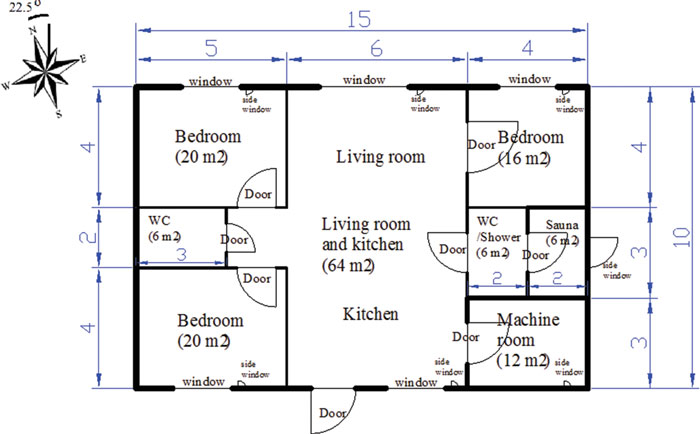

In [4]:
IMAGE_PATH = "./data/floorplan1.png"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "What's the area of this house floorplan?")
display(HTML(result))

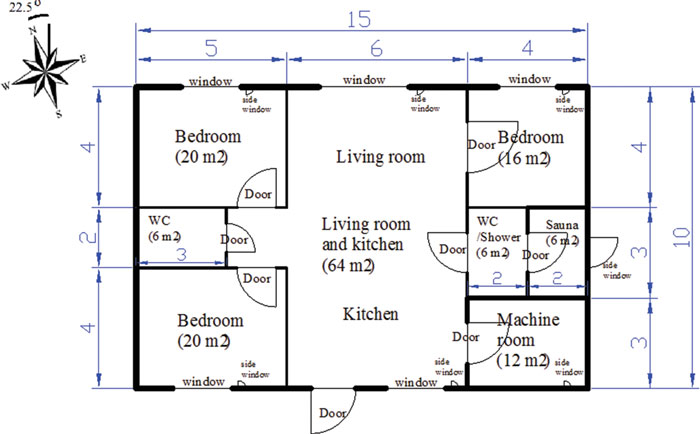

In [5]:
IMAGE_PATH = "./data/floorplan1.png"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "How many bedrooms are in the floorplan?")
display(HTML(result))

#### Let's ask GPT4o to measure a floorplan without calculated areas

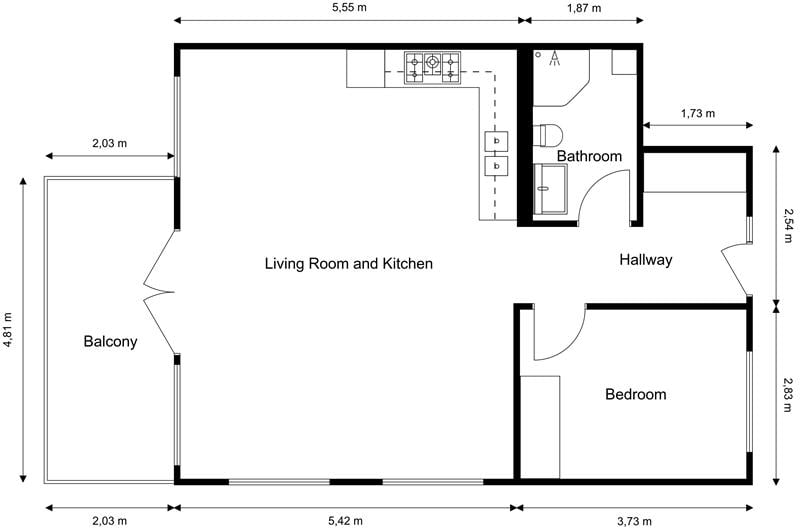

In [5]:
IMAGE_PATH = "./data/floorplan2.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "What's the area of this house floorplan?")
display(HTML(result))

#### Interpret an organizational chart

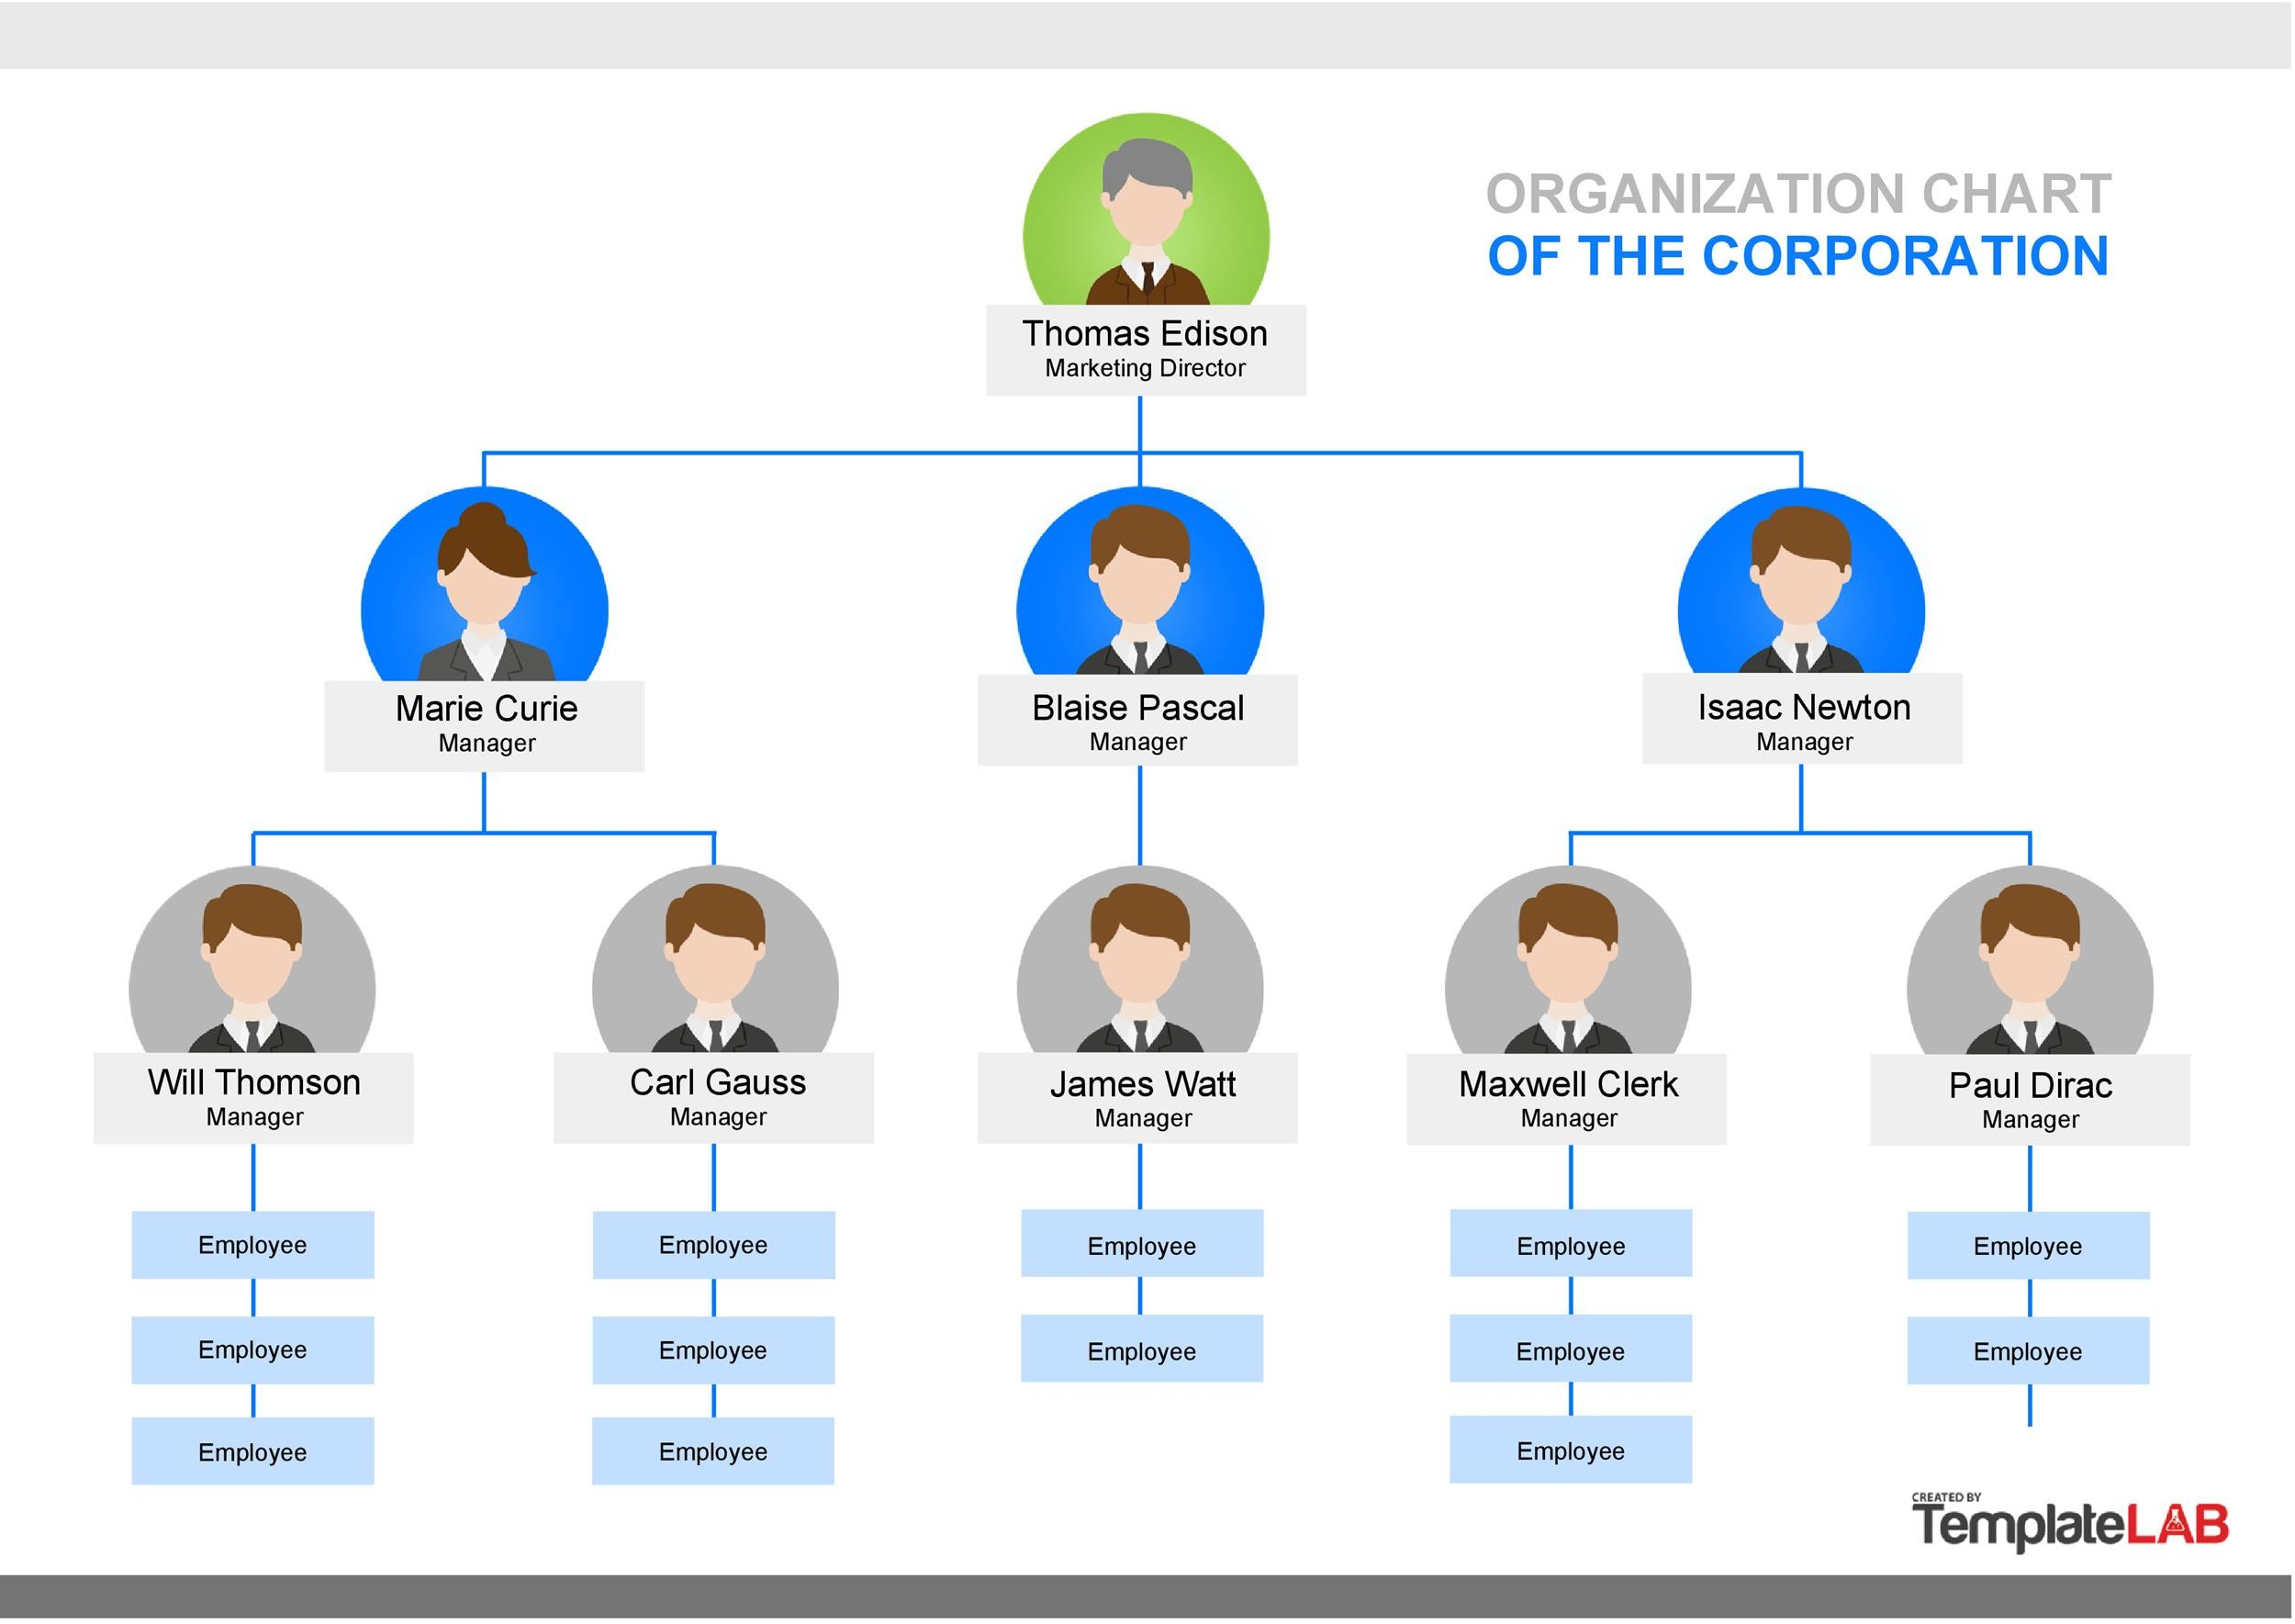

In [6]:
IMAGE_PATH = "./data/orgchart.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "How many direct and indirect reports Marie curie has?")
display(HTML(result))

#### Now analyze a graph

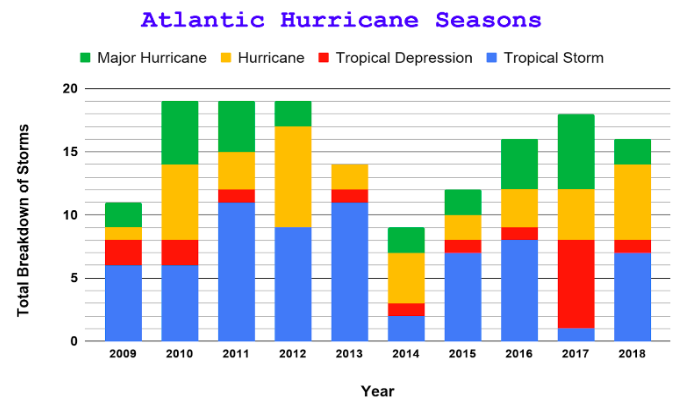

In [7]:
IMAGE_PATH = "./data/storm2.png"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Which year had less Major Hurricanes?")
display(HTML(result))

#### Identifying hazardous objects and situations

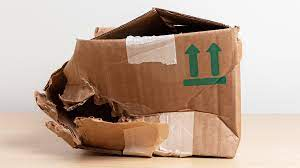

In [8]:
IMAGE_PATH = "./data/damaged1.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Is the package damaged? Describe the damage in 1 sentence")
display(HTML(result))

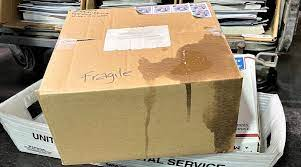

In [9]:
IMAGE_PATH = "./data/damaged4.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Is the package damaged? Describe the damage in 1 sentence")
display(HTML(result))

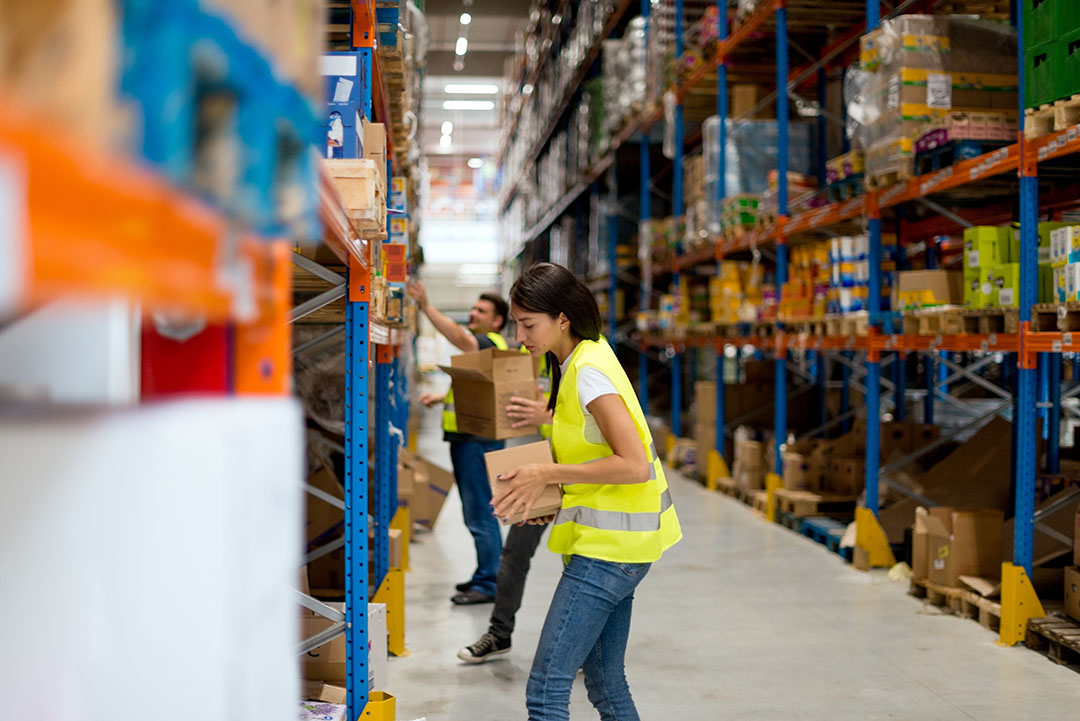

InternalServerError: Error code: 500 - {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': None, 'param': None, 'code': None}}

In [10]:
IMAGE_PATH = "./data/hazard1.jpeg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Do you see any security hazards in this image?")
display(HTML(result))

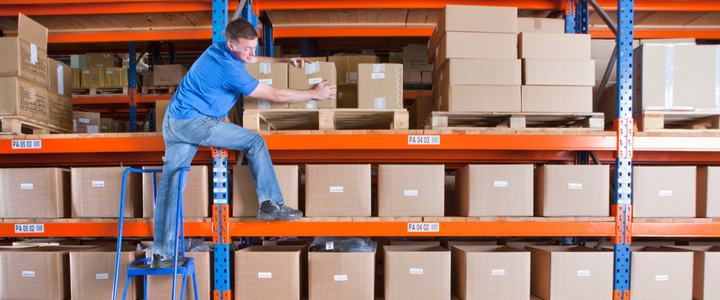

In [ ]:
IMAGE_PATH = "./data/hazard2.png"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Do you see any security hazards in this image?")
display(HTML(result))

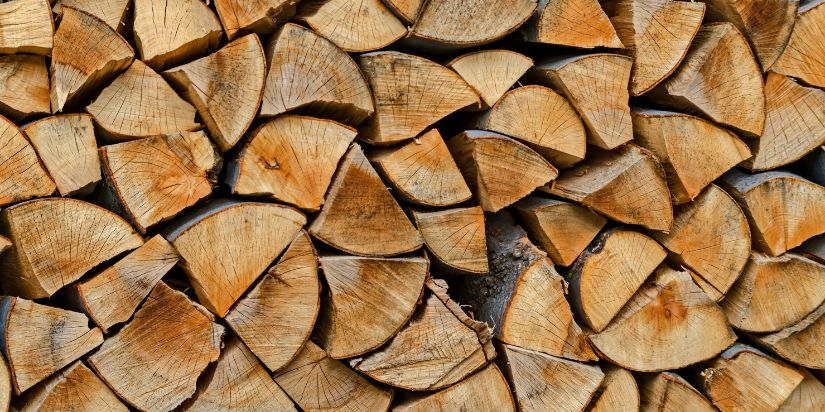

In [ ]:
IMAGE_PATH = "./data/logs2.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "How many logs in the image?")
display(HTML(result))